In [0]:
import torch
import torch.nn.functional as f
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('data'.format(
      name=fn, length=len(uploaded[fn])))

Saving Salary_Data.csv to Salary_Data.csv
data


In [0]:
data=pd.read_csv("Salary_Data.csv")

In [0]:
x_train = np.array([data['YearsExperience'].values],dtype=np.float32)

y_train = np.array([data['Salary'].values], dtype=np.float32)

x_train = x_train.reshape(-1, 1).astype('float32')
y_train = y_train.reshape(-1, 1).astype('float32')

In [0]:
input_size = 1
output_size = 1
num_epochs = 500
learning_rate = 0.02

In [12]:
model = nn.Linear(input_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print ('Epoch [{}/{}], Loss: {:.2f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [50/500], Loss: 84810760.00
Epoch [100/500], Loss: 54161656.00
Epoch [150/500], Loss: 41057788.00
Epoch [200/500], Loss: 35455276.00
Epoch [250/500], Loss: 33059944.00
Epoch [300/500], Loss: 32035834.00
Epoch [350/500], Loss: 31597968.00
Epoch [400/500], Loss: 31410766.00
Epoch [450/500], Loss: 31330732.00
Epoch [500/500], Loss: 31296506.00


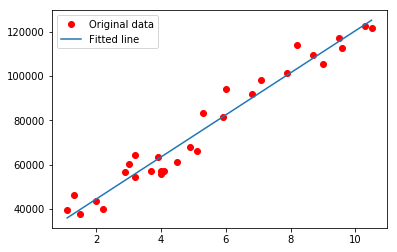

In [13]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()
